<a href="https://colab.research.google.com/github/SanjayS2348553/TRIMESTER-2/blob/main/2348553_prg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/computers.csv')

In [ ]:
df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [ ]:
#calculating mean value
mean_value=df['Minutes'].mean()

Text(1, 99.71428571428571, 'Average Repair Time')

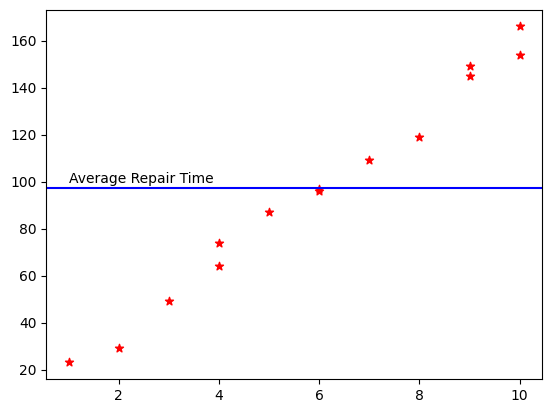

In [ ]:
#plotting the actual time taken
plt.scatter(df['Units'],df['Minutes'],color='red',marker='*')

#plotting mean
plt.axhline(y=mean_value,color='blue')

#adding annotation,xLabel and Y label
plt.annotate("Average Repair Time",xy=(1,mean_value+2.5))

In [ ]:
Minutes_model1=df['Minutes'].mean()
Minutes_model2=10+12*df['Units']
Minutes_model3=6+18*df['Units']
print(Minutes_model1)
print(Minutes_model2)
print(Minutes_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [ ]:
df['Minutes_model1'] = Minutes_model1
df['Minutes_model2'] = Minutes_model2
df['Minutes_model3'] = Minutes_model3

In [ ]:
df

,Units,Minutes,Minutes_model1,Minutes_model2,Minutes_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


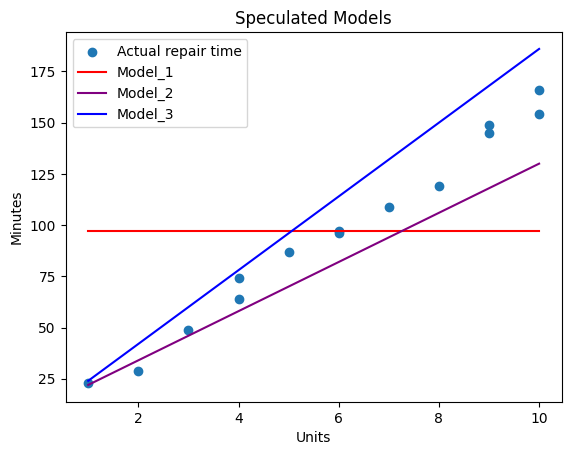

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data = df,label='Actual repair time')
ax.plot(df['Units'],df['Minutes_model1'], color='red',label= 'Model_1')
ax.plot(df['Units'],df['Minutes_model2'], color='purple',label= 'Model_2')
ax.plot(df['Units'],df['Minutes_model3'], color='blue',label= 'Model_3')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()




In [ ]:
mod1_obs = pd.DataFrame({'Units':df.Units,
                        'Minutes':df.Minutes,
                        'Predicted_time':df.Minutes_model1,
                        'Error':(df.Minutes_model1 - df.Minutes)})

mod1_obs.head()

,Units,Minutes,Predicted_time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286


In [ ]:
sum(mod1_obs.Error**2)

27768.357142857145

In [ ]:
mod2_obs = pd.DataFrame({'Units':df.Units,
                        'Minutes':df.Minutes,
                        'Predicted_time':df.Minutes_model2,
                        'Error':(df.Minutes_model2 - df.Minutes)})

mod2_obs.head()

,Units,Minutes,Predicted_time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16


In [ ]:
sum(mod2_obs.Error**2)

4993

In [ ]:
mod3_obs = pd.DataFrame({'Units':df.Units,
                        'Minutes':df.Minutes,
                        'Predicted_time':df.Minutes_model3,
                        'Error':(df.Minutes_model3 - df.Minutes)})

mod3_obs.head()

,Units,Minutes,Predicted_time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4


In [ ]:
sum(mod3_obs.Error**2)

5001

Best Fit Models

In [ ]:
x = df.Units
y = df.Minutes

xy = x*y
n = len(df)

xmean = df.Units.mean()
ymean = df.Minutes.mean()

numerator = xy.sum()-n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)

m = numerator/denominator
c = ymean - (m*xmean)

print('intercept-c : ',c,'\ncoefficient-m : ', m)

intercept-c :  4.161654135338296 
coefficient-m :  15.508771929824569


In [ ]:
#estimating time
min_best_fit_model = c+m*df.Units

df['min_best_fit_model'] = min_best_fit_model
df[['Units','min_best_fit_model']]

,Units,min_best_fit_model
0,1,19.670426
1,2,35.179198
2,3,50.687970
3,4,66.196742
4,4,66.196742
5,5,81.705514
6,6,97.214286
7,6,97.214286
8,7,112.723058
9,8,128.231830


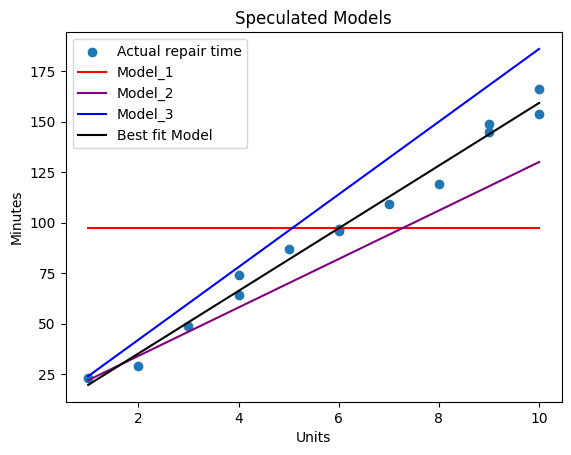

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data = df,label='Actual repair time')
ax.plot(df['Units'],df['Minutes_model1'], color='red',label= 'Model_1')
ax.plot(df['Units'],df['Minutes_model2'], color='purple',label= 'Model_2')
ax.plot(df['Units'],df['Minutes_model3'], color='blue',label= 'Model_3')
ax.plot(df['Units'],df['min_best_fit_model'], color='black',label= 'Best fit Model')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

Text(0.5, 1.0, 'Best fit model line')

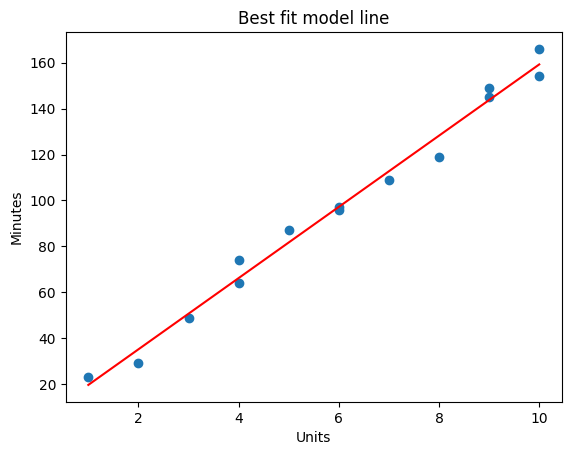

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x='Units',y='Minutes',data=df)

ax.plot(df.Units, df.min_best_fit_model, color = "red")

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title("Best fit model line")

In [ ]:
best_fit_error = pd.DataFrame({'Units': df['Units'],
                          'Actual Time': df['Minutes'],
                          'Predicted_value ': dt['min_best_fit'],
                          'Error':(dt.min_best_fit-dt['Minutes'])

                          })
print('Best fit error',sum(best_fit_error['Error']**2))
print(sum(model_obs1['Error']**2))
print(sum(model_obs2['Error']**2))
print(sum(model_obs3['Error']**2))

,Units,Actual Time,predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [ ]:
sum(best_fit_model_obs.Error**2)

348.848370927318

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()